In [2]:
packageVersion("monocle3")
rm(list = ls())  # Clear the environment
options(warn=-1) # Turn off warning message globally
library("monocle3") # Load Monocle
library("Biobase")
library("Seurat")
library("ggplot2")
library("xlsx")

[1] ‘0.2.3.0’

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; vie


# subsetting cells and genes

In [9]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
P23M<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23M.rds")
P35M<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35M.rds")
AM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AM.rds")
Cast<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Cast.rds")
P23F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23F.rds")
P35F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35F.rds")
AF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AF.rds")
OVX<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/OVX.rds")

In [10]:
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)

In [11]:
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_P23M",sep=""),intersect(colnames(P23M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35M",sep=""),intersect(colnames(P35M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AM",sep=""),intersect(colnames(AM@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_Cast",sep=""),intersect(colnames(Cast@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P23F",sep=""),intersect(colnames(P23F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35F",sep=""),intersect(colnames(P35F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AF",sep=""),intersect(colnames(AF@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_OVX",sep=""),intersect(colnames(OVX@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [12]:
Hormone_rich<-c(Vgat2_barcode,Vgat4_barcode,Vgat16_barcode)

In [13]:
Vgat_barcode_AM<-intersect(rownames(AM@meta.data),Hormone_rich)
Vgat_barcode_P35M<-intersect(rownames(P35M@meta.data),Hormone_rich)
Vgat_barcode_P23M<-intersect(rownames(P23M@meta.data),Hormone_rich)
Vgat_barcode_Cast<-intersect(rownames(Cast@meta.data),Hormone_rich)
Vgat_barcode_AF<-intersect(rownames(AF@meta.data),Hormone_rich)
Vgat_barcode_P35F<-intersect(rownames(P35F@meta.data),Hormone_rich)
Vgat_barcode_P23F<-intersect(rownames(P23F@meta.data),Hormone_rich)
Vgat_barcode_OVX<-intersect(rownames(OVX@meta.data),Hormone_rich)

In [14]:
celltype<-vector()
conditiontype<-vector()
for (i in 1:dim(MPOA.integrated@meta.data)[1]){
    celltype[i]<-new.ident[as.numeric(MPOA.integrated@meta.data$integrated_snn_res.0.8[i])]
    conditiontype[i]<-paste(MPOA.integrated@meta.data$stim[i],celltype[i],sep="")
}
MPOA.integrated@meta.data$celltype<-celltype
MPOA.integrated@meta.data$conditiontype<-conditiontype

In [15]:
merge_all<-subset(x =MPOA.integrated, cells=c(Vgat_barcode_P23F,Vgat_barcode_P35F,Vgat_barcode_AF,Vgat_barcode_OVX))

In [16]:
celltype<-vector()
conditiontype<-vector()
for (i in 1:dim(merge_all@meta.data)){
    k<-grep(rownames(merge_all@meta.data)[i],rownames(MPOA.integrated@meta.data))
    celltype[i]<-MPOA.integrated$celltype[k]
    conditiontype[i]<-MPOA.integrated$conditiontype[k]
}
merge_all@meta.data$celltype<-celltype
merge_all@meta.data$conditiontype<-conditiontype

In [17]:
merge_all@meta.data$stim<-factor(merge_all@meta.data$stim,levels=c("P23F","P35F","AF","OVX"))
merge_all@meta.data$celltype<-factor(merge_all@meta.data$celltype,levels=c("Vgat2","Vgat4","Vgat16"))

using DEGs generated using log data

In [12]:
library(xlsx)
x<-200
gene_list<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_OVX/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)     
if(dim(gene_list)[1]>x){gene_list<-gene_list[order(gene_list[,"p_val_adjust"]),][1:x,]}else{
    gene_list<-gene_list
}


unique_gene1<-unique(c(as.character(gene_list[,1])))

gene_list<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P35F_over_OVX/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)     
if(dim(gene_list)[1]>x){gene_list<-gene_list[order(gene_list[,"p_val_adjust"]),][1:x,]}else{
    gene_list<-gene_list
}

unique_gene2<-unique(c(as.character(gene_list[,1])))

unique_gene<-unique(c(unique_gene1,unique_gene2))

# make monocle object

In [13]:
GTF <- read.table(file='/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/features.tsv')
colnames(GTF)<-c("id","gene_short_name","gene_expression")
common<-intersect(GTF$gene_short_name,rownames(merge_all@assays$RNA@data))

In [15]:
GTF<-GTF[GTF$gene_short_name %in% common, ]
merge_all@assays$RNA@counts<-merge_all@assays$RNA@counts[common, ]
GTF<-GTF[!duplicated(GTF$gene_short_name),]

In [16]:
rownames(GTF)<-GTF$gene_short_name

In [17]:
merge_all_m <-new_cell_data_set(as.matrix(merge_all@assays$RNA@counts), cell_metadata =merge_all@meta.data,gene_metadata = GTF)
merge_all_m  <- preprocess_cds(merge_all_m ,  num_dim =12,use_genes=unique_gene)
merge_all_m <- reduce_dimension(merge_all_m,reduction_method = "UMAP",preprocess_method = 'PCA')

In [18]:
merge_all_m  <- cluster_cells(merge_all_m )

In [19]:
merge_all_m <- learn_graph(merge_all_m,use_partition = FALSE)

  |======================================================================| 100%


In [20]:
#201119
cell_type_color <- c("P23F"= "gray8",
"P35F"= "#E0479E",
"AF"="#832232",
"OVX"= "#FFCD73")

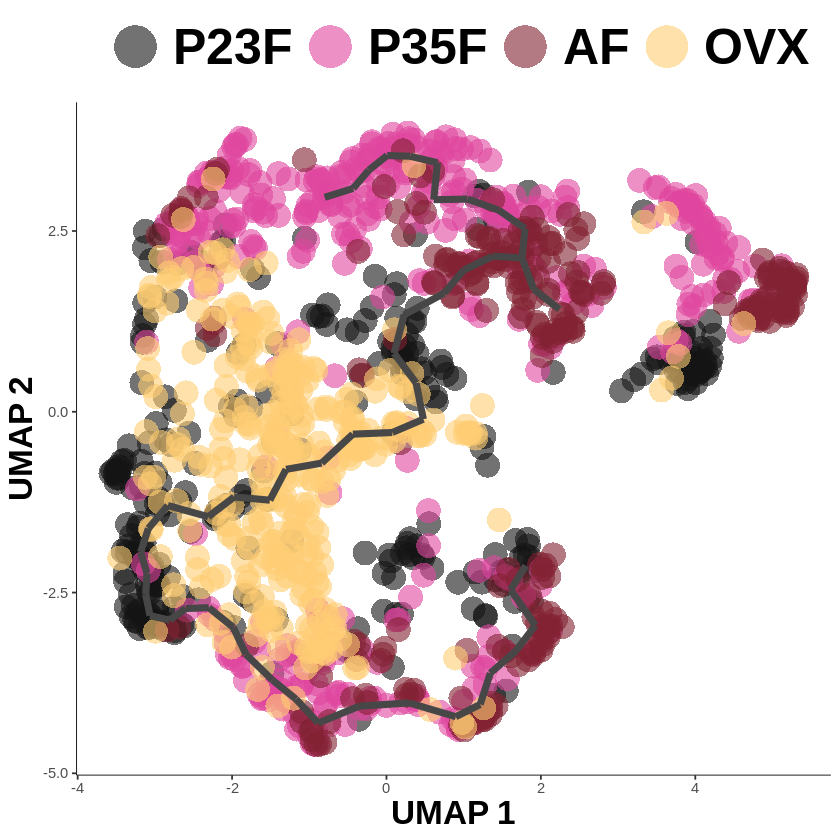

In [21]:
plot_cells(merge_all_m,
           color_cells_by = "stim",cell_size =7,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 2,label_roots = FALSE,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
                     scale_color_manual(values = cell_type_color)+ guides(colour = guide_legend(override.aes = list(size=12)))+theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold")
    ,legend.title=element_blank(), legend.text=element_text(size = 30,face="bold") ,legend.position ="top")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Esr1_3/trajectory_stim_female_VgatEsr1_onlyusing3_200_12dim_usingEsr1gene.pdf",width=9,height=10)

In [23]:
get_earliest_principal_node <- function(merge_all_m, stim="OVX"){
  cell_ids <- which(colData(merge_all_m)[, "stim"] == stim)
  
  closest_vertex <-
  merge_all_m@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(merge_all_m), ])
  root_pr_nodes <-
  igraph::V(principal_graph(merge_all_m)[["UMAP"]])$name[as.numeric(names
  (which.max(table(closest_vertex[cell_ids,]))))]
  
  root_pr_nodes
}
merge_all_m<- order_cells(merge_all_m, root_pr_nodes=get_earliest_principal_node(merge_all_m))

In [25]:
pseudotime<-numeric()
for (i in 1:length(merge_all_m@ principal_graph_aux$UMAP$pseudotime)){
    pseudotime[i]<-merge_all_m@ principal_graph_aux$UMAP$pseudotime[[i]]
}

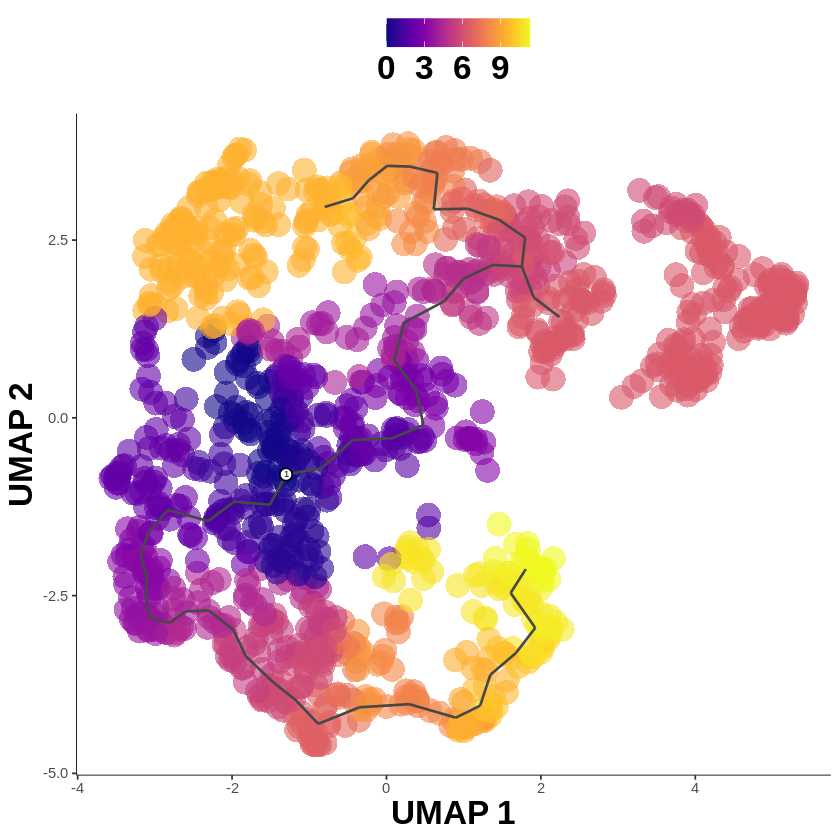

In [26]:
plot_cells(merge_all_m,
           color_cells_by = "pseudotime",cell_size =7,alpha = 0.6,label_cell_groups = FALSE,trajectory_graph_segment_size = 0.75,
           label_leaves=FALSE,cell_stroke = I(0/2),
           label_branch_points=FALSE)+
theme(title=element_text(size=20,angle=0,face="bold"),strip.text = element_text(size = 40,face="bold")
    ,legend.title=element_blank(), legend.text=element_text(size = 20,face="bold") ,legend.position ="top")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Esr1_3/trajectory_psedutime_female_VgatEsr1_onlyusing3_200_12dim_usingEsr1gene_rootOVX.pdf",width=9,height=10)

# visualizing genes

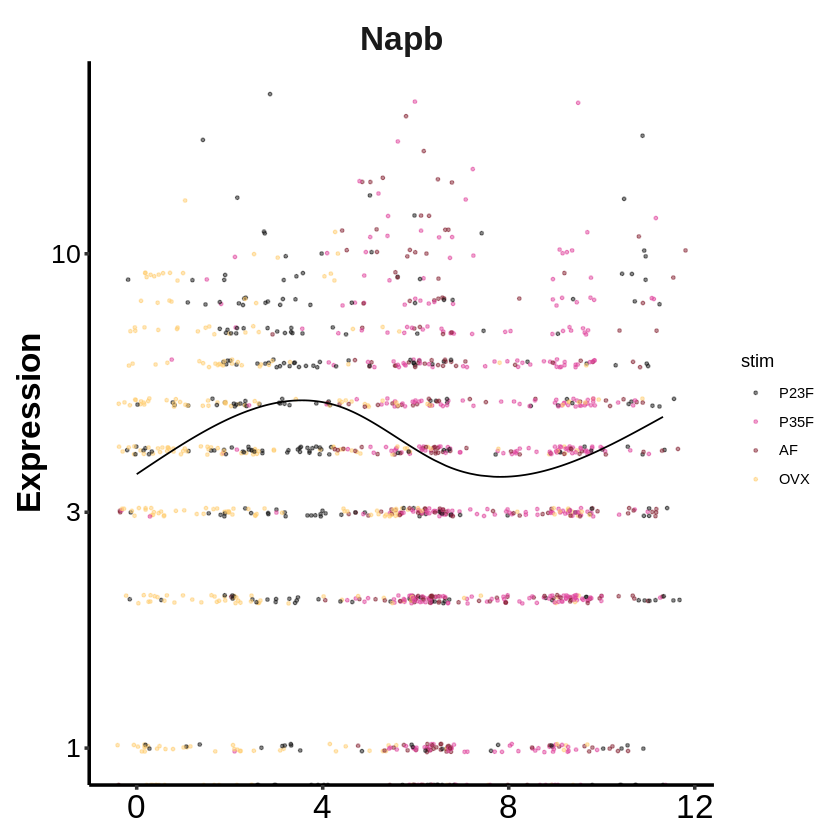

In [50]:
genes <- c("Napb")
mini <- merge_all_m[rowData(merge_all_m)@rownames %in% genes,]
p<-plot_genes_in_pseudotime(mini,label_by_short_name = FALSE,horizontal_jitter=0.5,color_cells_by="stim", cell_size = 0.7)
p+ #scale_y_continuous(breaks=c(0.5,5))+
theme(strip.text = element_text(size=20, face="bold")) +
scale_color_manual(values =alpha(cell_type_color,0.5))+theme(axis.text.x=element_text(size=20, angle=0,vjust=0.8,hjust = 0.5,colour = "black"),axis.text.y=element_text(size=16, hjust = 1,colour = "black"),axis.title.y=element_text(size=20,face="bold"),axis.title.x=element_blank(),plot.title = element_text(size=50,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = 'black', size = 5),axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))+
theme(axis.line.x = element_line(size=1, color="black"),axis.line.y = element_line(size=1, color="black")) 
ggsave(file=paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Esr1_3/trajectory_",genes,"_femalegene_12.pdf",sep=""),width=4,height=2)

# Heatmap DEGs along trajectory

In [3]:
merge_all_m<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Esr1_3/Vgat_Esr1_200_12_merge_all_m.rds")

In [4]:
Cell_type<-c("P23F","OVX","P35F","AF")
Cell_type<-factor(Cell_type,levels=Cell_type)
AF_OVX_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_OVX/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
AF_P23F_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_P23F/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
OVX_AF_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/OVX_over_AF/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
P23F_AF_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P23F_over_AF/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
P35F_OVX_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P35F_over_OVX/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
P35F_P23F_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P35F_over_P23F/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
OVX_P35F_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/OVX_over_P35F/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
P23F_P35F_gene<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/P23F_over_P35F/gene_adjust_Vgat_0.1.xlsx",sheetIndex=1)[,1]
hormone_50gene<-AF_OVX_gene
hormone_35gene<-P35F_OVX_gene
OVX_50gene<-OVX_AF_gene
OVX_35gene<-OVX_P35F_gene
P50_gene<-as.character(AF_P23F_gene)[!(AF_P23F_gene %in% c(hormone_50gene,hormone_35gene))]
P35_gene<-as.character(P35F_P23F_gene)[!(P35F_P23F_gene %in% c(hormone_50gene,hormone_35gene))]
P23_50_gene<-as.character(P23F_AF_gene)[!(P23F_AF_gene %in% OVX_50gene)]
P23_35_gene<-as.character(P23F_P35F_gene)[!(P23F_P35F_gene %in% OVX_35gene)]
age_gene<-unique(intersect(rev(P35_gene),rev(P50_gene))) # this is the list of genes that are high in mice >P35
#hormone_gene<-unique(intersect(hormone_50gene,hormone_35gene)) # this is the list of genes that are high in intact mice >P35
hormone_gene<-unique(c(as.character(hormone_50gene),as.character(hormone_35gene)))
young_gene<-P23_50_gene # this is the list of genes that are only high in P23
OVX_gene<-as.character(OVX_50gene)

In [5]:
gene_list<-rev(unique(rev(c(young_gene,OVX_gene,age_gene,hormone_gene))))

In [6]:
max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)
# if the number is XX.3 or something below 0.5 you need to -1 below

[1] 11.31755

In [7]:
# you may or maynot need -1
spacing<-20
Pseudotime<-seq(0, ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)), by=ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime))/spacing)
Pseudotime<-Pseudotime[1:spacing-1]
int<-Pseudotime[2]-Pseudotime[1]

In [18]:
#probably need to revisit +0.5
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
max_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)[Pseudotime[p]< merge_all_m@principal_graph_aux@listData$UMAP$pseudotime &  merge_all_m@principal_graph_aux@listData$UMAP$pseudotime<Pseudotime[p]+int]
Cell_number_t$avg[p]<-(mean(merge_all@assays$RNA@data[gene_list[i],barcode])-mean(merge_all@assays$RNA@data[gene_list[i],]))/sd(merge_all@assays$RNA@data[gene_list[i],])
}
Cell_number<-rbind(Cell_number_t,Cell_number)
max_number_t<-subset(Cell_number_t,Cell_number_t$avg==max(Cell_number_t$avg))
max_number<-rbind(max_number_t,max_number)    
}
#Cell_number$Pseudotime<-factor(Cell_number$Pseudotime,levels=Pseudotime)

In [19]:
for(i in 1:dim(Cell_number)[1]){
    if(is.nan(Cell_number$avg[i])){
        Cell_number$avg[i]<-0
    }}

In [20]:
max_number_sort<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
for (i in 1:length(Pseudotime)){
    temp<-subset(max_number,cluster==Pseudotime[i])
    temp<-temp[order(temp$avg),]
    max_number_sort<-rbind(max_number_sort,temp)}

In [21]:
Cell_number$cluster<-factor(Cell_number$cluster,levels=Pseudotime)

In [22]:
Cell_number$gene<-factor(Cell_number$gene,levels=rev(unique(max_number_sort$gene)))

In [23]:
library("scales")

In [24]:
temp_gene<-rev(unique(max_number_sort$gene))

In [25]:
#gene_list
color<-numeric()
size<-numeric()
for(i in 1:length(temp_gene)){
    if(temp_gene[i]=="Selenow" | temp_gene[i]=="Ndn" | temp_gene[i]=="Apba1" | temp_gene[i]=="Fau" |temp_gene[i]=='Irs4'|temp_gene[i]=='Hspa8' |temp_gene[i]=='Npm1' | temp_gene[i]=="Nrp1" | temp_gene[i]=="Sv2c" | temp_gene[i]=="Pgr"| temp_gene[i]=="Alcam" | temp_gene[i]=="Apoc3"){
        color[i]<-"black"
        size[i]<-20
    }else{
        color[i]<-"white"
        size[i]<-0
    }
}

In [28]:
color_x<-numeric()
size_x<-numeric()
for(i in 1:length(Pseudotime)){
    if(Pseudotime[i]==Pseudotime[1] | Pseudotime[i]==Pseudotime[7] |  Pseudotime[i]==Pseudotime[13] | Pseudotime[i]==Pseudotime[19]){
        color_x[i]<-"black"
        size_x[i]<-25
    }else{
        color_x[i]<-"white"
        size_x[i]<-0
    }
}

In [26]:
genes<-c("Slc32a1","Esr1","Ar","Alcam","Pdzrn4","Creb3l1","Sccpdh","Socs2","Pgr","Tmem35a","Nts","Tead1","Napb","Selenow","Apba1","Sv2c","Ndn")

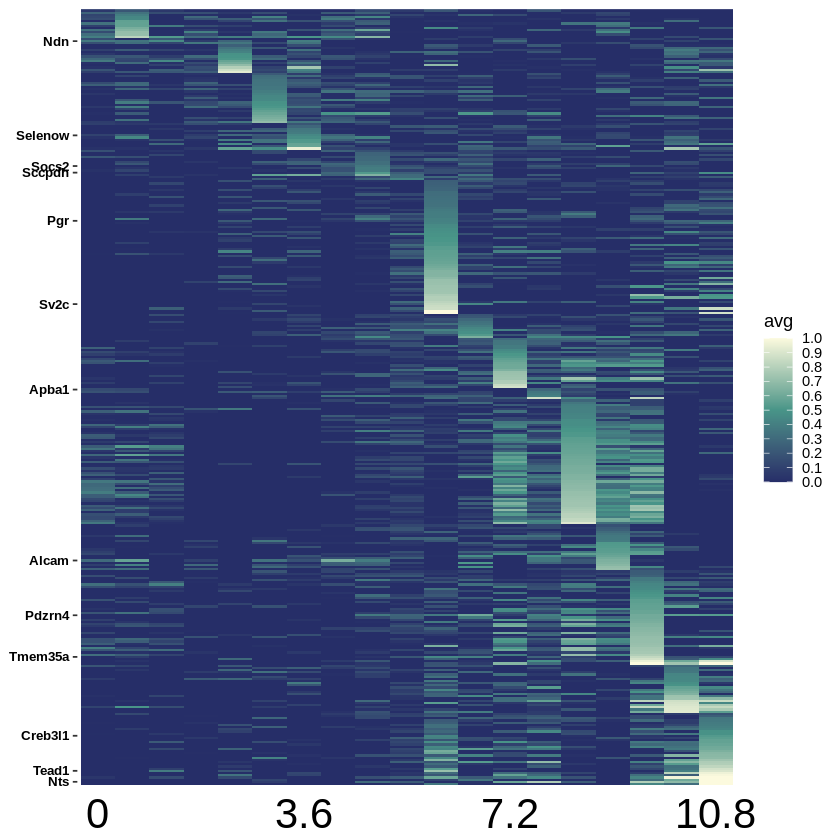

In [30]:
#210222 paper
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"
low<- 0
high<- 1
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = gene,fill =avg,label=gene)) + scale_y_discrete(breaks=c(genes))+
  geom_tile() + scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = 0.5,oob=squish) #scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=0.2),low = "black",high = "yellow", oob=squish)
pp<-p+ylab("gene")+xlab("psedutime")+theme(axis.text.y=element_text(size=8, colour = "black",face="bold"),axis.text.x=element_text(size=size_x,angle = 0, hjust =0.5,vjust=0.3,colour = color_x),axis.title=element_blank(),plot.title = element_blank(),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line.x = element_line(colour = "white", size = 0),axis.ticks.x = element_blank())+ggtitle("heatmap marker gene")
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Esr1_3/DEG_heatmap_light_DEGtrajectory_12_BLcorrecty",low,"_",high,"_color_adjusted.pdf"),width=7,height=10)

# proportion of each group along Pseudotime

In [31]:
spacing<-20
Pseudotime<-seq(0, ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)), by=ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime))/spacing)
Pseudotime<-Pseudotime[1:spacing-1]

In [32]:
group<-c("P23F","OVX","P35F","AF")

In [33]:
int<-Pseudotime[2]-Pseudotime[1]

In [34]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(group)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "group"=(rep(group[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)[Pseudotime[p]< merge_all_m@principal_graph_aux@listData$UMAP$pseudotime &  merge_all_m@principal_graph_aux@listData$UMAP$pseudotime<Pseudotime[p]+int]
Cell_number_t$proportion[p]<-100*sum(grepl(group[i],barcode))/dim(subset(merge_all@meta.data,stim==group[i]))[1]}
Cell_number<-rbind(Cell_number_t,Cell_number)}

In [35]:
Cell_number$group<-factor(Cell_number$group,levels=rev(group))

In [36]:
Cell_number$cluster<-factor(Cell_number$cluster,levels=Pseudotime)

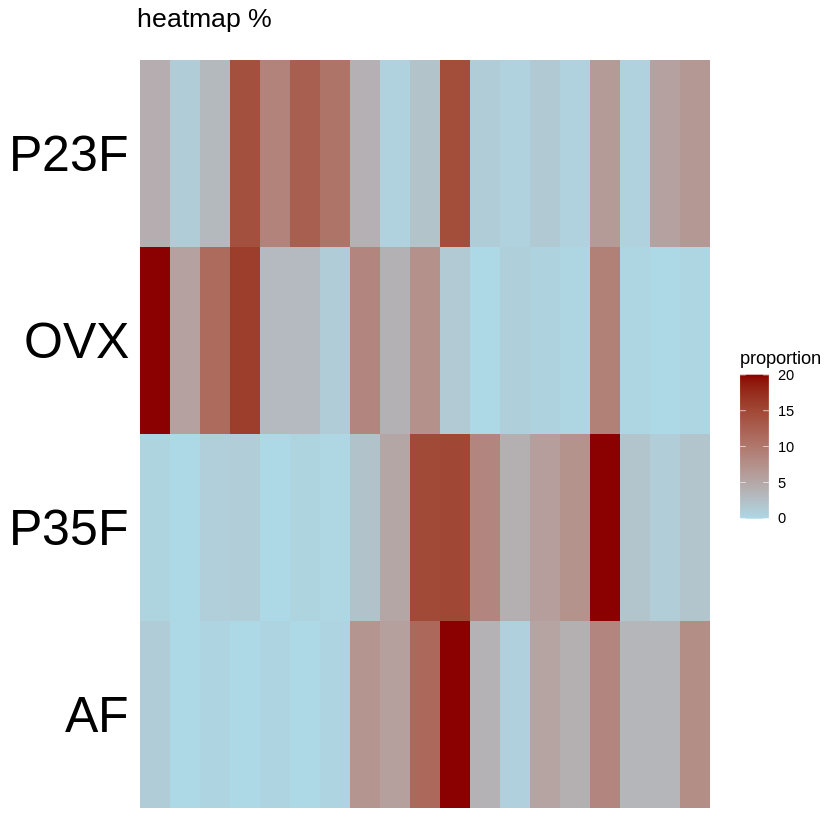

In [39]:
low<-0
high<-20
p<-ggplot(data = Cell_number, mapping = aes(x = cluster, y = group,fill =proportion)) +
  geom_tile() + scale_fill_continuous(limits=c(low, high), breaks=seq(low,high,by=5),low = "lightblue",high = "darkred", oob=squish)
pp<-p+ylab("proportion %")+xlab("psedutime")+theme(axis.text.y=element_text(size=30, colour = "black"),axis.text.x=element_blank(),axis.title=element_blank(),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "white", size = 0),axis.ticks.y = element_blank(),axis.ticks.x = element_blank())+ggtitle("heatmap %")
print(pp)
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Esr1_3/group_proportion_heatmap_lightint",low,"_",high,"color_adjusted.pdf"),width=10,height=2)

# comparing monomorphic and dimorphic genes

In [13]:
male_hormone<- read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AM_over_Cast/All_gene.xlsx",sheetIndex=1)
rownames(male_hormone)<-male_hormone[,1]
female_hormone<- read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/AF_over_OVX/All_gene.xlsx",sheetIndex=1)
rownames(female_hormone)<-female_hormone[,1]
dimorphic<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Esr1_3/dimorphic/dimorphic genes.xlsx",sheetIndex=1)
rownames(dimorphic)<-dimorphic[,2]

In [14]:
rank<-c(1:dim(male_hormone)[1])
male_hormone$rank<-rank

In [15]:
rank<-c(1:dim(female_hormone)[1])
female_hormone$rank<-rank

In [16]:
common<-intersect(rownames(subset(male_hormone,avg_logFC>0 & p_val_adjust<0.05)),rownames(subset(female_hormone,avg_logFC>0 & p_val_adjust<0.05)))

In [17]:
color<-numeric()
for(i in 1:dim(female_hormone)[1]){
    if(female_hormone$avg_logFC[i]>0 & female_hormone$p_val_adjust[i]<0.05 & rownames(female_hormone)[i] %in% common){
        color[i]<-"lightgoldenrod"
    }else if(female_hormone$avg_logFC[i]>0 & female_hormone$p_val_adjust[i]<0.05 & !rownames(female_hormone)[i] %in% common){
        color[i]<-"salmon"
    }else{
       color[i]<-"black" 
    }
}
female_hormone$color<-color

In [19]:
female<-subset(female_hormone,avg_logFC>0)

In [20]:
female_only<-rownames(subset(female,color=="salmon"))
common<-rownames(subset(female,color=="lightgoldenrod"))

In [12]:
merge_all_m<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Esr1_3/Vgat_Esr1_200_12_merge_all_m.rds")

In [13]:
spacing<-20
Pseudotime<-seq(0, ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)), by=ceiling(max(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime))/spacing)
Pseudotime<-Pseudotime[1:spacing-1]
int<-Pseudotime[2]-Pseudotime[1]

In [38]:
gene_list<-female_only

In [39]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)


for (i in 1:length(gene_list)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)[Pseudotime[p]< merge_all_m@principal_graph_aux@listData$UMAP$pseudotime &  merge_all_m@principal_graph_aux@listData$UMAP$pseudotime<Pseudotime[p]+int]
Cell_number_t$avg[p]<-(mean(merge_all@assays$RNA@data[gene_list[i],barcode])-mean(merge_all@assays$RNA@data[gene_list[i],]))/sd(merge_all@assays$RNA@data[gene_list[i],])
}
Cell_number<-rbind(Cell_number_t,Cell_number)
 
}

In [40]:
Cell_number$type<-rep("female_only",dim(Cell_number)[1])
Cell_number1<-Cell_number

In [41]:
gene_list<-common

In [42]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)


for (i in 1:length(gene_list)){
L<-length(Pseudotime)

Cell_number_t<- data.frame("cluster" =Pseudotime, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Pseudotime)){
barcode<-names(merge_all_m@principal_graph_aux@listData$UMAP$pseudotime)[Pseudotime[p]< merge_all_m@principal_graph_aux@listData$UMAP$pseudotime &  merge_all_m@principal_graph_aux@listData$UMAP$pseudotime<Pseudotime[p]+int]
Cell_number_t$avg[p]<-(mean(merge_all@assays$RNA@data[gene_list[i],barcode])-mean(merge_all@assays$RNA@data[gene_list[i],]))/sd(merge_all@assays$RNA@data[gene_list[i],])
}
Cell_number<-rbind(Cell_number_t,Cell_number)
 
}

In [44]:
Cell_number$type<-rep("shared",dim(Cell_number)[1])
Cell_number2<-Cell_number
Cell_number<-rbind(Cell_number1,Cell_number2)

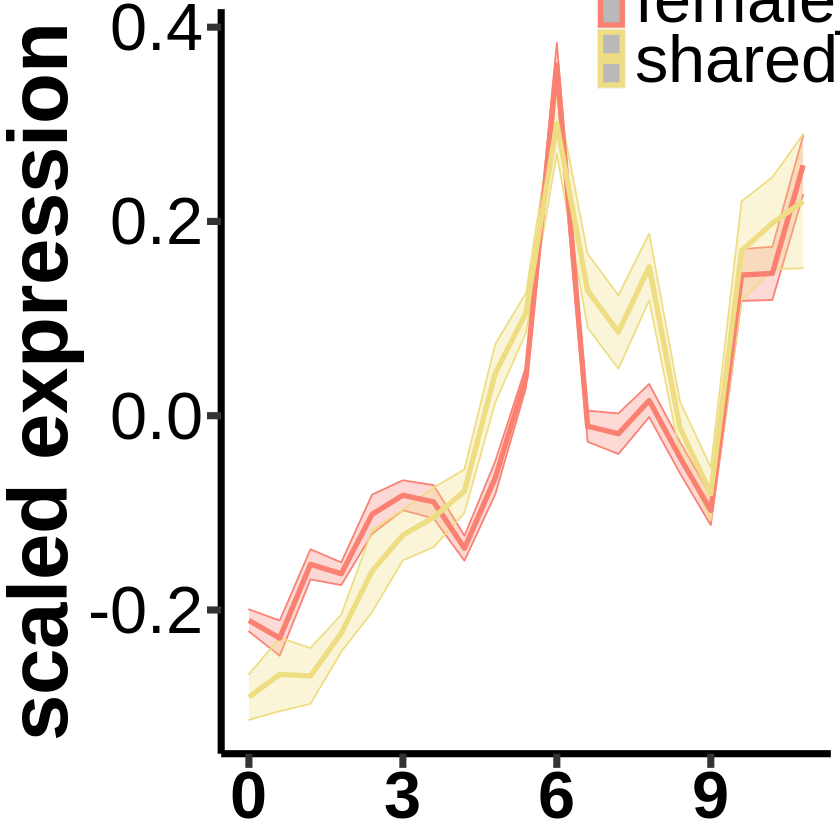

In [72]:

ggplot(Cell_number,aes(x=cluster,y=avg,color=type,group=type,fill=type))+
stat_summary(fun.y = mean,
               fun.ymin = function(x) mean(x) - sd(x)/(length(x))^0.5, 
               fun.ymax = function(x) mean(x) + sd(x)/(length(x))^0.5, 
               geom = "ribbon", alpha = 0.3,fill=c(rep("salmon",19),rep("lightgoldenrod",19))) +

  stat_summary(fun.y = mean,
               geom = "line",  size=1.5) +
scale_color_manual(labels=c("female_only","shared"),values=c("salmon","lightgoldenrod"))+
ylab("scaled expression")+ guides(colour = guide_legend(override.aes = list(size=3)))+
theme(axis.text.x=element_text(size=40,angle =0,hjust = 0.5, color="black",face="bold"),axis.text.y=element_text(size=40,hjust = 1, color="black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_blank(),plot.title = element_text(size=24),,panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),axis.line = element_line(colour = "black",size=2),legend.title=element_blank(),legend.text=element_text(size=40),legend.position=c(0.94,0.98),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2))
ggsave(file=paste(text="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Trajectory/female/Esr1_3/dimorphic_genes",".pdf"),width=10,height=8)